# Python для автоматизации и анализа данных

## Домашнее задание 6 (дедлайн: 14 декабря 2021 23:59 (мск))

*Если работа сдается после дедлайна, то за каждый день просрочки отнимается 1 балл (из 10 максимально возможных)*

**Загружать работу на дропбокс: https://www.dropbox.com/request/DwZC4gmATeWOvtXBBvNm** в виде `ipynb`-файла. Получить `ipynb`-файл можно, выбрав в Jupyter пункт меню *File → Download as... → IPython Notebook (.ipynb)*.

*Материалы взяты из курсов Тамбовцевой Аллы «Основы программирования в Python» и Рогович Татьяны «Python для исследователей», а также онлайн-курса «Python как иностранный»*

In [ ]:
import pandas as pd
babies = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/babies%20names/babies_all.txt')
babies.tail()

,Unnamed: 0,name,sex,number,year
1690779,33833,Zymaire,M,5,2010
1690780,33834,Zyonne,M,5,2010
1690781,33835,Zyquarius,M,5,2010
1690782,33836,Zyran,M,5,2010
1690783,33837,Zzyzx,M,5,2010


Данные взяты с сайта Social Security и содержат информацию об именах всех новорожденных в США с 1880 года.

https://www.ssa.gov/oact/babynames/limits.html

Данные:

* name - Имя детей
* sex - Пол (мужское или женское)
* number - Количество детей с таким именем
* year - год.

Т.е. последняя строчка читается так: В 2010 году родилось пять мальчиков, которых назвали Zzyzx

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

__Задание 10. (1 балл)__

Исследуйте набор данных babies. Ответьте на вопросы.

1) Какие годы входят в наш набор данных?


In [ ]:
babies.year.unique()

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

2) Какое имя в датасете находится по индексом 121 (считаем от 0)?

In [ ]:
babies.name.iloc[121]

'Ann'

In [ ]:
babies.iloc[121]['name']

'Ann'

3) Cколько всего родилось детей назвали 'Aaron' за все время?



In [ ]:
babies[babies.name == 'Aaron'].number.sum()

527668

4) Найдите абсолютную разницу между количеством рожденных мальчиков и девочек за все время.

In [ ]:
abs(babies.groupby('sex').number.sum()[0] - babies.groupby('sex').number.sum()[1])

2422447

5) Сколько в датасете девочек по имени John?

In [ ]:
babies[(babies.sex == 'F') & (babies.name == 'John')].number.sum()

21578

__Задание 2. (1.5 балла)__

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: babies_girls и babies_boys. Т.е. должно получиться два датафрейма, где каждому году соответствует общее количество детей, рожденных в этом году.
2. Создайте фигуру matplotlib с 3 графиками один под другим.
3. Постройте линейные графики. Первый график должен показывать линию тренда рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - шкала x, количество детей - шкала y. 
4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.
5. Для шкалы y, показывающей количество детей, рожденных в этот год, должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут .index


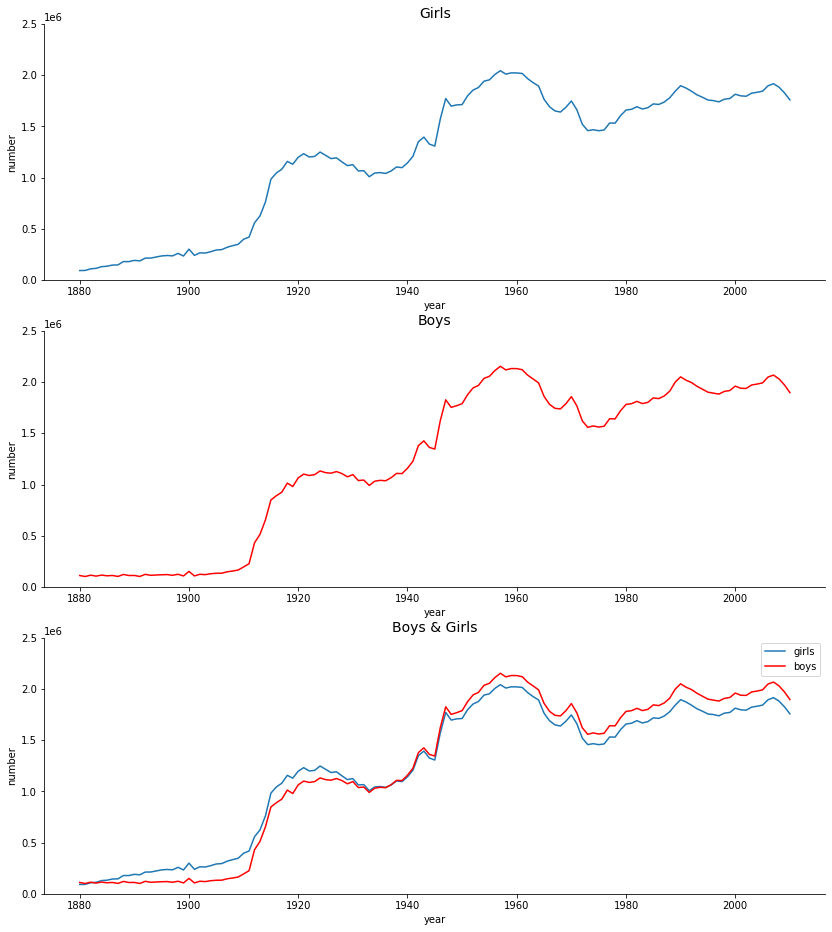

In [ ]:
babies_girls=babies.groupby(['sex','year']).agg('sum').loc['F']
babies_boys=babies.groupby(['sex','year']).agg('sum').loc['M']
fig,ax = plt.subplots(3,1, figsize=(14,16))

ax[0].plot(babies_girls.index, babies_girls.number)
ax[0].set_title('Girls', fontsize=14)
ax[1].plot(babies_boys.index, babies_boys.number,color='red')
ax[1].set_title('Boys', fontsize=14)
ax[2].plot(babies_girls.index, babies_girls.number,label='girls')
ax[2].plot(babies_boys.index ,babies_boys.number, label='boys',color='red')
ax[2].set_title('Boys & Girls', fontsize=14)
ax[2].legend()
for x in range(3):
    ax[x].spines['top'].set_visible(False) 
    ax[x].spines['right'].set_visible(False) 
    ax[x].set_ylabel('number')
    ax[x].set_xlabel('year')
    ax[x].set_ylim(0,2500000)

__Задание 3 (1.5 балла)__

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).
2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные такого формата: сколько детей в каждый год называли таким именем.
3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.
4. Постройте 4 линейных графика - тренд для каждого имени за все время, каждая линия своего цвета.
5. Верхняя и правая границы графиков должны быть невидимы, один общий заголовок, шкалы графиков должны быть подписаны.
6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на всех графиках.

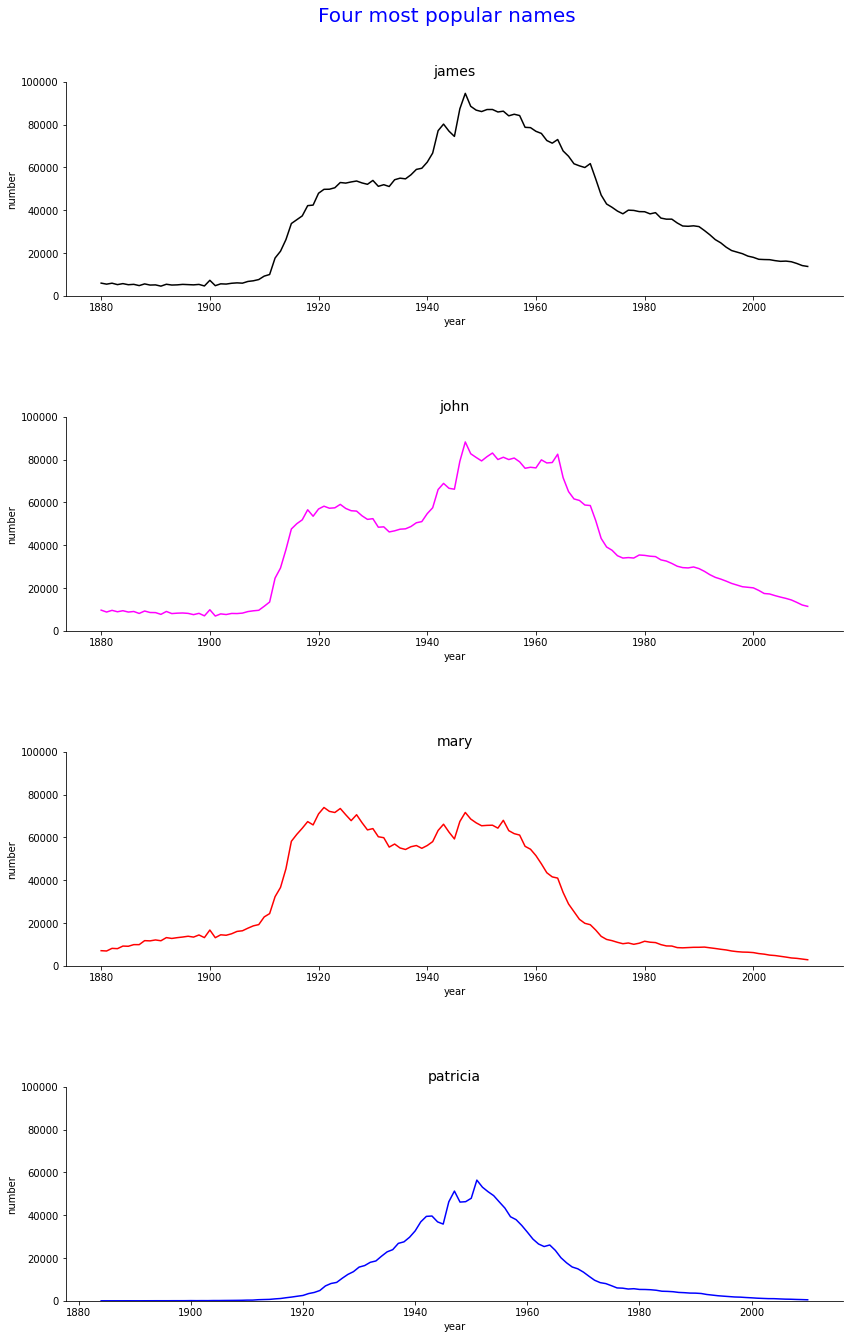

In [ ]:
babies.groupby(['sex','name']).sum().sort_values(by=['sex','number'],ascending=False).groupby(level=0).head(2)
james = babies.query('sex == "M" & name == "James"')
john = babies.query('sex == "M" & name == "John"')
mary = babies.query('sex == "F" & name == "Mary"')
patricia = babies.query('sex == "F" & name == "Patricia"')

fig,ax = plt.subplots(4,1, figsize=(14,20))
fig.suptitle('Four most popular names',fontsize=20, color='blue')
fig.tight_layout(pad=10.0)

ax[0].plot(james.year, james.number,color='black')
ax[0].set_title('james', fontsize=14)
ax[1].plot(john.year, john.number,color='magenta')
ax[1].set_title('john', fontsize=14)
ax[2].plot(mary.year, mary.number,color='red')
ax[2].set_title('mary', fontsize=14)
ax[3].plot(patricia.year, patricia.number,color='blue')
ax[3].set_title('patricia', fontsize=14)


for x in range(4):
    ax[x].spines['top'].set_visible(False) 
    ax[x].spines['right'].set_visible(False) 
    ax[x].set_ylabel('number')
    ax[x].set_xlabel('year')
    ax[x].set_ylim(0,100000)


__Задание 4. (1.5 балла)__

1. В оригинальном датафрейме babies создайте новую колонку - первая буква имени.
2. Выберете три года из датасета: 1900, 1950, 2000. Сгруппируйте датасет, чтобы в нем в рядах были первые буквы, а в колонках - количество детей с такими именами. Сохраните три новых датафрейма для 1900, 1950 и 2000 года (например, babies_first_1900).
3. Создайте фигуру matplotlib с 3 горизонтальными графиками один под другим.
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. Постройте столбчатую диаграмму для каждого года в отдельном графике.

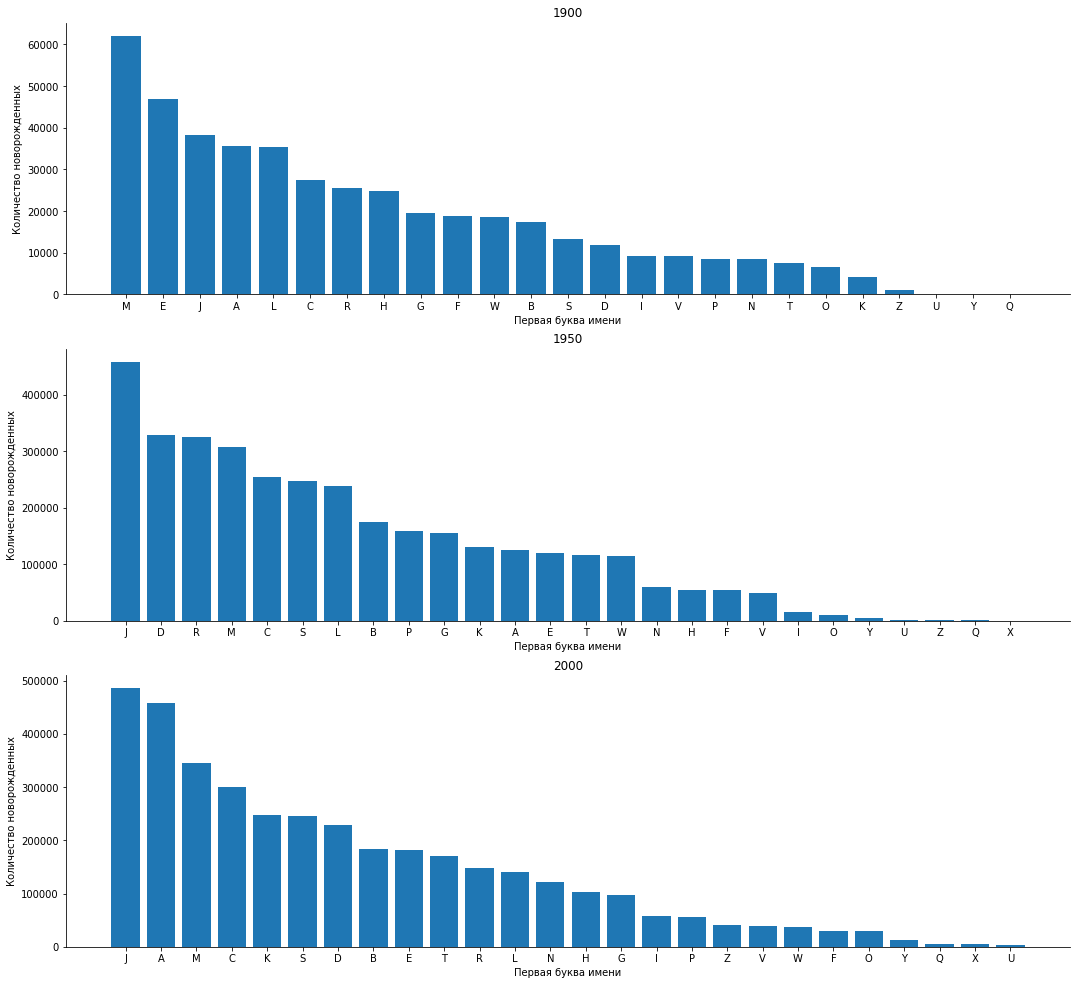

In [ ]:
babies['first_letter'] = babies.name.str[0]

babies_first_2000 = babies[babies.year == 2000].groupby(
    'first_letter', as_index=False).number.sum().sort_values('number',
                                                             ascending=False)
babies_first_1950 = babies[babies.year == 1950].groupby(
    'first_letter', as_index=False).number.sum().sort_values('number',
                                                             ascending=False)
babies_first_1900 = babies[babies.year == 1900].groupby(
    'first_letter', as_index=False).number.sum().sort_values('number',
                                                             ascending=False)

fig, ax = plt.subplots(3, 1, figsize=(18, 17))
ax[0].bar(babies_first_1900.first_letter, babies_first_1900.number)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_ylabel('Количество новорожденных')
ax[0].set_xlabel('Первая буква имени')
ax[0].set_title('1900')

ax[1].bar(babies_first_1950.first_letter, babies_first_1950.number)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_ylabel('Количество новорожденных')
ax[1].set_xlabel('Первая буква имени')
ax[1].set_title('1950')

ax[2].bar(babies_first_2000.first_letter, babies_first_2000.number)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].set_ylabel('Количество новорожденных')
ax[2].set_xlabel('Первая буква имени')
ax[2].set_title('2000')

plt.show()

__Задание 5. (3 балла)__

1. Разделите данные на 10 равных временных промежутков (например, 1880 - 1889, 1900 - 1919). Если 10 равных промежутков не получается, то не учитывайте последние несколько лет.
2. Для каждого временного промежутка найдите самые популярные женские и мужские имена (по одному). Итого, у вас должно получиться 20 имен (имена могут повторяться). 
Выведите их значения: в формате "С 1880 до 1889 самым популярным женским именем было Mary, мужским - John" (10 строк одна под другой).
3. Создайте фигуру matplotlib с 2 горизонтальными графиками один под другим.
4. В одном графике постройте линейные тренды общего количества мальчиков или девочек, которых называли этим именем, за все время для найденных женских имен, а во втором для мужских. Каждое имя своим цветом. 
5. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны, у графиков должна быть легенда.
6. Прочитайте ответ на [stackoverflow](https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot-in-matplotlib), как добавлять на график статические линии. Добавьте на оба графика *тонкие серые* вертикальные линии, которые должны обозначать границы ваших временных промежутков (например, 1900, 1910 и т.д.)

In [ ]:
babies['period'] = pd.cut(babies.year, 10)

def min_max_template(interval):
    '''
    Функция возвращает миниальное и максимальное значение интервала
    для заданного интервала
    '''

    return f'С {min(interval)} до {max(interval)}'


babies['partition_by_10'] = babies.groupby('period')['year'].transform(min_max_template)

popular_f = []
popular_m = []
for i in babies.partition_by_10.unique():
    
    period_f = babies[(babies.partition_by_10 == i)
                      & (babies.sex == 'F')].groupby(
                          'name', as_index=False)['number'].sum().sort_values(
                              'number',
                              ascending=False).head(1).name.tolist()[0]
    
    period_m = babies[(babies.partition_by_10 == i)
                      & (babies.sex == 'M')].groupby(
                          'name', as_index=False)['number'].sum().sort_values(
                              'number',
                              ascending=False).head(1).name.tolist()[0]
    print(
        f'{i} самым популярным женским именем было {period_f}, мужским - {period_m}'
    )
    popular_f.append(period_f)
    popular_m.append(period_m)

popular_girls = babies[babies.name.isin(popular_f)].reset_index()
popular_boys = babies[babies.name.isin(popular_m)].reset_index()
pivot_f = popular_girls[popular_girls.sex=='F'].pivot(columns='name', values='number', index='year')
pivot_m = popular_boys[popular_boys.sex=='M'].pivot(columns='name', values='number', index='year')

С 1880 до 1893 самым популярным женским именем было Mary, мужским - John
С 1894 до 1906 самым популярным женским именем было Mary, мужским - John
С 1907 до 1919 самым популярным женским именем было Mary, мужским - John
С 1920 до 1932 самым популярным женским именем было Mary, мужским - Robert
С 1933 до 1945 самым популярным женским именем было Mary, мужским - James
С 1946 до 1958 самым популярным женским именем было Linda, мужским - James
С 1959 до 1971 самым популярным женским именем было Lisa, мужским - Michael
С 1972 до 1984 самым популярным женским именем было Jennifer, мужским - Michael
С 1985 до 1997 самым популярным женским именем было Jessica, мужским - Michael
С 1998 до 2010 самым популярным женским именем было Emily, мужским - Jacob


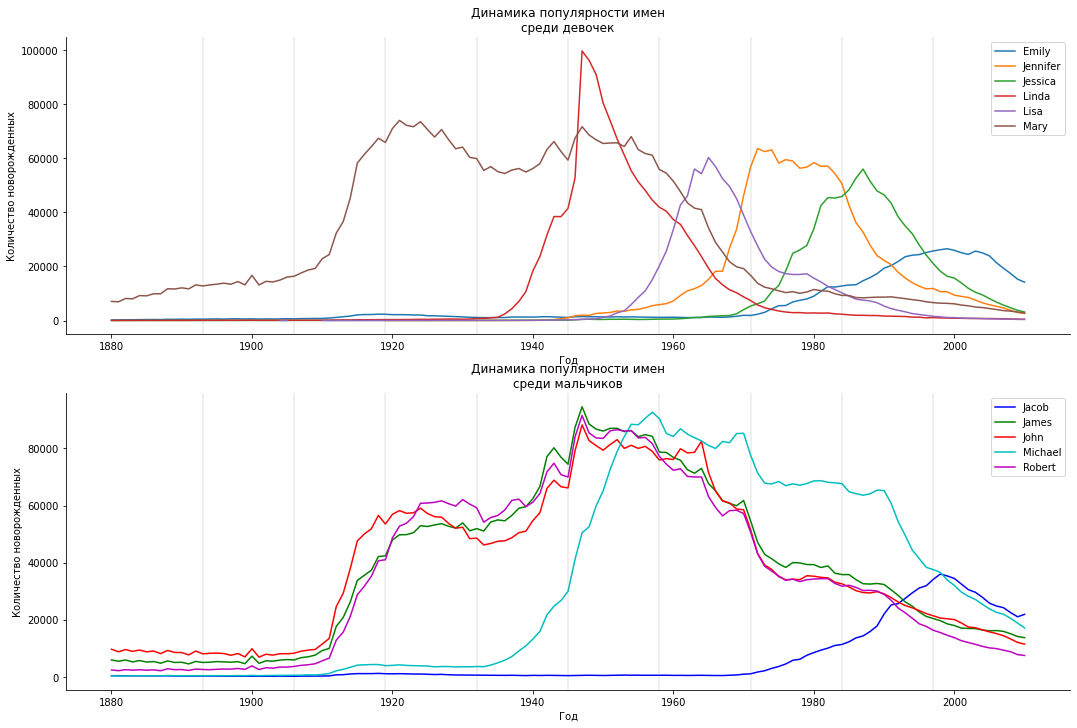

In [ ]:
colors_m = ['b', 'g', 'r', 'c', 'm']
coords = babies.groupby('period')['year'].max().tolist()[:-1]

fig, ax = plt.subplots(2, 1, figsize=(18, 12))

for column in pivot_f:
    ax[0].plot(pivot_f.index, pivot_f[column])
    
for i in range(0, 5):
    ax[1].plot(pivot_m.index, pivot_m.iloc[:, i], c=colors_m[i])

ax[0].legend(pivot_f.columns)
ax[0].set_ylabel('Количество новорожденных')
ax[0].set_xlabel('Год')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_title('Динамика популярности имен\nсреди девочек')



ax[1].legend(pivot_m.columns)
ax[1].set_ylabel('Количество новорожденных')
ax[1].set_xlabel('Год')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_title('Динамика популярности имен\nсреди мальчиков')

for xc in coords:
    ax[0].axvline(x=xc, c='gray',lw=0.25)
    ax[1].axvline(x=xc, c='gray',lw=0.25)

plt.show()